# Binning motivation

**Goal:** Do things.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt

# Let's do ATLAS style plots too!
import os
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
ep = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
               537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
               1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])

In [4]:
print(ep)

[ 150  250  262  275  288  302  317  332  348  365  383  402  422  443
  465  488  512  537  563  591  620  651  683  717  752  789  828  869
  912  957 1004 1054 1106 1161 1219 1279 1342 1409 1479 1552 1629 1710
 1795 1884 1978 2076]


In [5]:
print(len(ep))

46


In [6]:
round(12.5)

12

In [10]:
def get_bin_edgs(r=(250,1100),res=.05):
    '''
    Goal: Return a list for the bin edges between X and Y 
    which use a fixed resolution (default 5% to match the baseline analysis).
    '''
    
    edgs = [r[0]]
    
    while edgs[-1] < r[1]:
        edgs.append( round((1+res)*edgs[-1]) )
    
    return edgs
    

In [14]:
for res in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    edg = get_bin_edgs(res=res)
    print(res, edg,len(edg)-1,'\n')

0.05 [250, 262, 275, 289, 303, 318, 334, 351, 369, 387, 406, 426, 447, 469, 492, 517, 543, 570, 598, 628, 659, 692, 727, 763, 801, 841, 883, 927, 973, 1022, 1073, 1127] 31 

0.06 [250, 265, 281, 298, 316, 335, 355, 376, 399, 423, 448, 475, 504, 534, 566, 600, 636, 674, 714, 757, 802, 850, 901, 955, 1012, 1073, 1137] 26 

0.07 [250, 268, 287, 307, 328, 351, 376, 402, 430, 460, 492, 526, 563, 602, 644, 689, 737, 789, 844, 903, 966, 1034, 1106] 22 

0.08 [250, 270, 292, 315, 340, 367, 396, 428, 462, 499, 539, 582, 629, 679, 733, 792, 855, 923, 997, 1077, 1163] 20 

0.09 [250, 272, 296, 323, 352, 384, 419, 457, 498, 543, 592, 645, 703, 766, 835, 910, 992, 1081, 1178] 18 

0.1 [250, 275, 302, 332, 365, 402, 442, 486, 535, 588, 647, 712, 783, 861, 947, 1042, 1146] 16 



In [8]:
edgs = get_bin_edgs((250,1100))
np.array(edgs)

array([ 250,  262,  275,  289,  303,  318,  334,  351,  369,  387,  406,
        426,  447,  469,  492,  517,  543,  570,  598,  628,  659,  692,
        727,  763,  801,  841,  883,  927,  973, 1022, 1073, 1127])

In [25]:
edgs = get_bin_edgs((250,1200),.08)
np.array(edgs),len(edgs)

(array([ 250,  270,  292,  315,  340,  367,  396,  428,  462,  499,  539,
         582,  629,  679,  733,  792,  855,  923,  997, 1077, 1163, 1256]),
 22)

In [9]:
len(edgs)

34

In [14]:
resolutions = [.05,.06,.07,.08,.09,.1]
nBins = []

for res in resolutions:
    
    edg = get_bin_edgs((250,1200),res)
    nBins.append(len(edg))

In [15]:
plt.plot(resolutions,nBins,lw=0,marker='o')
plt.xlabel('resolution')
plt.ylabel('# bins')

Text(0, 0.5, '# bins')

In [16]:
sname = '../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_mc16a.root'
bname = '../data/RR/cryptotuples/ggF_rw/data16_NN_100_bootstraps.root'

In [17]:
cols = ['ntag','m_hh','dEta_hh','pass_vbf_sel','X_wt_tag']

with uproot.open(sname) as sf:
    sdf = sf['sig'].arrays(cols+['mc_sf'],library='pd')

with uproot.open(bname) as bf:
    bdf = bf['sig'].arrays(cols+['NN_d24_weight_bstrap_med_16'],library='pd')
    bdf['w_2b'] = bdf['NN_d24_weight_bstrap_med_16'] * bf[f'NN_norm_bstrap_med_16'].all_members['fVal']
    
sdf = sdf[~sdf.pass_vbf_sel & (sdf.X_wt_tag > 1.5)]
bdf = bdf[~bdf.pass_vbf_sel & (bdf.X_wt_tag > 1.5)]

In [33]:
edg

[250,
 275,
 302,
 332,
 365,
 402,
 442,
 486,
 535,
 588,
 647,
 712,
 783,
 861,
 947,
 1042,
 1146,
 1261]

In [74]:
sdf.mc_sf

entry  subentry
0      0           0.000019
1      0           0.000012
2      0          -0.000013
3      0           0.000015
4      0           0.000013
                     ...   
55832  0           0.000018
55834  0           0.000013
55835  0           0.000013
55836  0           0.000015
55837  0          -0.000014
Name: mc_sf, Length: 50870, dtype: float32

In [76]:
s0 = np.histogram2d(*sdf[['m_hh','dEta_hh']].values.T,[39,3],[[225,1200],[0,1.5]],
                    weights=sdf.mc_sf.values)[0]
b0 = np.histogram2d(*bdf[['m_hh','dEta_hh']].values.T,[39,3],[[225,1200],[0,1.5]],
                    weights=bdf.w_2b.values)[0]

z0 = np.sqrt(np.sum( s0[b0!=0]**2 / b0[b0!=0] ))

In [77]:
s1 = np.histogram2d(*sdf[['m_hh','dEta_hh']].values.T,[13,3],[[225,1200],[0,1.5]],
                    weights=sdf.mc_sf.values)[0]
b1 = np.histogram2d(*bdf[['m_hh','dEta_hh']].values.T,[13,3],[[225,1200],[0,1.5]],
                    weights=bdf.w_2b.values)[0]

z1 = np.sqrt(np.sum( s1 / b1 ))

In [78]:
z1/z0

9.521831544768895

In [98]:
resolutions = [.05,.06,.07,.08,.09,.1]
nBins = []

zs = []
dzs = []
minBkg = []

for res in resolutions:
    
    edg = get_bin_edgs((250,1150),res)
    nBins.append(len(edg))

    bins = [edg+[np.inf],[0,0.5,1,1.5]]

    s_hist = np.histogram2d(*sdf[['m_hh','dEta_hh']].values.T,bins,weights=sdf.mc_sf.values)[0]
    b_hist = np.histogram2d(*bdf[['m_hh','dEta_hh']].values.T,bins,weights=bdf.w_2b.values)[0]
    
    s_err = np.sqrt(np.histogram2d(*sdf[['m_hh','dEta_hh']].values.T,bins,weights=sdf.mc_sf.values**2)[0])

    z_hist = s_hist / np.sqrt(b_hist)
    z = np.sqrt(np.sum(z_hist**2))
    
    z_err = (1/z) * np.sum( s_hist * s_err / b_hist)
    
    zs.append(z)
    dzs.append(z_err)
    minBkg.append(np.min(b_hist))
    

In [103]:
np.sum(s_hist * s_err / b_hist) /z

0.00013681082570302626

In [104]:
z

0.0038065664816281687

Text(0, 0.5, 'significace')

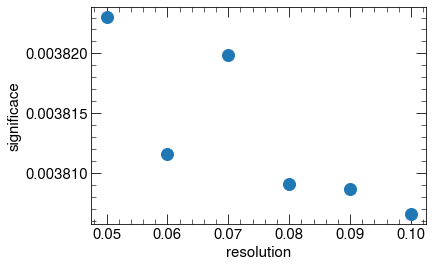

In [105]:
plt.plot(resolutions,zs,lw=0,marker='o',markersize=12)
plt.xlabel('resolution')
plt.ylabel('significace')

Text(0, 0.5, 'significace')

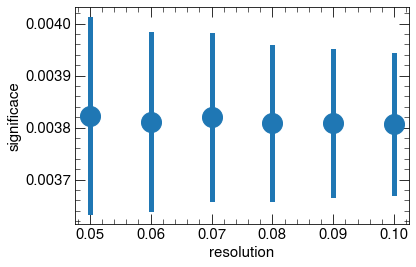

In [99]:
plt.errorbar(resolutions,zs,dzs,lw=0,elinewidth=5,marker='o',markersize=20)
plt.xlabel('resolution')
plt.ylabel('significace')

In [81]:
plt.plot(resolutions,np.array(zs)/z0,lw=0,marker='o')
plt.xlabel('resolution')
plt.ylabel('significace / [40 bins * 3 cats]')

Text(0, 0.5, 'significace / [40 bins * 3 cats]')

Text(0, 0.5, 'min # bkg entries')

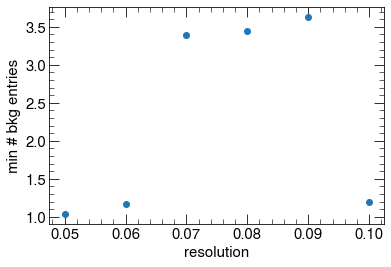

In [82]:
plt.plot(resolutions,minBkg,lw=0,marker='o')
plt.xlabel('resolution')
plt.ylabel('min # bkg entries')

In [84]:
bins = [edg+[np.inf],[0,.5,1,1.5]]

s_hist = np.histogram2d(*sdf[['m_hh','dEta_hh']].values.T,bins,weights=sdf.mc_sf.values)[0]
b_hist = np.histogram2d(*bdf[['m_hh','dEta_hh']].values.T,bins,weights=bdf.w_2b.values)[0]

In [85]:
edg

[250,
 275,
 302,
 332,
 365,
 402,
 442,
 486,
 535,
 588,
 647,
 712,
 783,
 861,
 947,
 1042,
 1146,
 1261]

In [86]:
b_hist

array([[1.81991336e+01, 1.96560616e+01, 8.37821338e+00],
       [5.07515641e+02, 2.79216156e+02, 1.54090586e+02],
       [2.34583591e+03, 1.56101276e+03, 7.84225998e+02],
       [3.81823871e+03, 3.16857669e+03, 1.97588187e+03],
       [3.51849348e+03, 3.42081483e+03, 2.95205780e+03],
       [2.38754988e+03, 2.64139224e+03, 2.76560190e+03],
       [1.61189109e+03, 1.80985218e+03, 2.19362473e+03],
       [1.06050899e+03, 1.20813479e+03, 1.59658845e+03],
       [6.78374549e+02, 7.73707583e+02, 9.85685046e+02],
       [4.53439591e+02, 5.31465224e+02, 6.90246131e+02],
       [2.84446611e+02, 3.39894250e+02, 3.95482100e+02],
       [1.71840131e+02, 2.47844967e+02, 2.78574560e+02],
       [1.04810906e+02, 1.19784922e+02, 1.77278723e+02],
       [5.74871393e+01, 7.12262090e+01, 1.28985580e+02],
       [3.49813733e+01, 5.44323992e+01, 5.09223426e+01],
       [1.56064238e+01, 1.46030781e+01, 3.35906088e+01],
       [3.27183497e+00, 1.00407087e+01, 2.79889946e+01],
       [2.17858848e+00, 1.19868

In [88]:
z_hist = s_hist / np.sqrt(b_hist)

In [89]:
z = np.sqrt(np.sum(z_hist**2))

In [90]:
z,z0

(0.0038065664816281687, 0.0038620400225031497)

In [91]:
z,z0

(0.0038065664816281687, 0.0038620400225031497)

In [92]:
len(edg)

18